In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.precision', 2)
pd.set_option('display.width', 200)
sns.set(rc={"axes.facecolor": "Beige", "axes.grid": False})
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Heart_Disease Dataset
data_path = "D:/git_projects/machine_learning/ml_visualization/dataset/heart.csv"
df = pd.read_csv(data_path)
df = df.dropna()
print(df.head(2))
print(f"Records: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
Records: 303
Columns: 14


Index([0, 2, 1, 3], dtype='int64', name='cp')

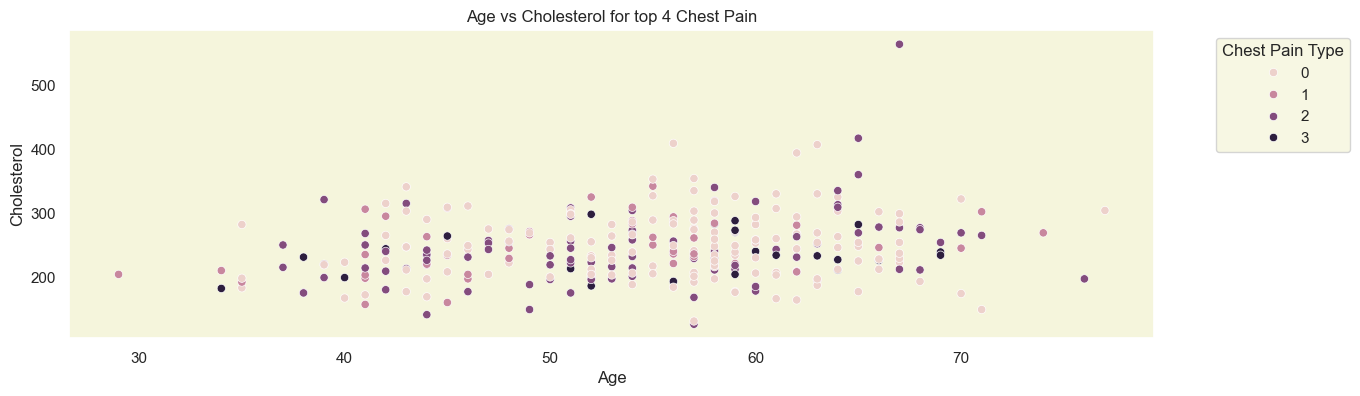

In [50]:
top_leagues = df['cp'].value_counts().nlargest(4).index
display(top_leagues)

plt.figure(figsize=(14, 4))
sns.scatterplot(x='age', y='chol', data=df[df['cp'].isin(top_leagues)], hue='cp')
plt.title("Age vs Cholesterol for top 4 Chest Pain")
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Chest Pain Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
import plotly.express as px

fig = px.scatter(df, x='chol', y='age', color='sex')
fig.update_layout(width=1000, height=300)
fig.update_layout(title_text="Scatter Plot of Cholesterol vs Age (colored by Sex)")
fig.show()

In [52]:
from plotly.offline import iplot

fig = px.box(x=df['age'], labels={'x':'Age'}, title='5-number-summary (Box Plot) of Age')
fig.update_layout(width=1000, height=300)
iplot(fig)

In [53]:
import plotly.express as px

fig = px.scatter(df, x='chol', y='age', color='cp', size='oldpeak', size_max=20, hover_name='exang')
fig.update_layout(width=1000, height=300)
fig.update_layout(title_text="Scatter Plot of Cholesterol vs Age (colored by cp)")
fig.show()

In [54]:
fig = px.scatter(data_frame=df, x='age', y='chol', color='cp', size='ca', hover_data=['oldpeak'])
fig.update_layout(title_text='<b> Cholesterol vs Age <b>', title_font={'size': 18, 'family':'candara'})
fig.update_layout(width=1000, height=300)
fig.show()

In [6]:
import plotly.express as px

fig = px.scatter(df, x='chol', y='age', color='cp', size='oldpeak', size_max=20, hover_name='exang', facet_col='cp', log_x=True)
fig.update_layout(width=1000, height=300)
fig.update_layout(title_text='Scatter Plot of Cholesterol vs Age (colored by cp)')
fig.show()

In [20]:
df1 = df
df1['sex'] = df1['sex'].astype(str)
fig = px.bar(df1, x='age', y='chol', hover_data=['oldpeak'], color='sex', height=300)
fig.show()

In [18]:
import plotly.express as px

def generate_rating_df(df):
    if 'id' not in df.columns: rating_df = df.insert(0, 'id', range(1, len(df) + 1))
    else: rating_df = df
    rating_df['cp'] = rating_df['cp'].astype(str)
    rating_df['slope'] = rating_df['slope'].astype(str)
    rating_df = rating_df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]
    rating_df.columns = ['cp', 'slope', 'counts']
    rating_df = rating_df.sort_values('slope')
    return rating_df

rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='cp', y='counts', color='slope')
fig.update_traces(textposition='auto', textfont_size=20)
fig.update_layout(width=1000, height=300, barmode='stack')
fig.show()

`Following code doesn't give the expected result`

In [17]:
import plotly.express as px

def generate_rating_df1(df):
    if 'id' not in df.columns: rating_df = df.insert(0, 'id', range(1, len(df) + 1))
    else: rating_df = df
    rating_df['cp'] = rating_df['cp'].astype(str)
    rating_df['slope'] = rating_df['slope'].astype(str)
    rating_df = rating_df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]
    rating_df.columns = ['cp', 'slope', 'counts']
    rating_df = rating_df.sort_values('slope')
    return rating_df

rating_df = generate_rating_df1(df)
fig = px.bar(rating_df, x='cp', y='counts', color='slope')
fig.update_traces(textposition='auto', textfont_size=14)
fig.update_layout(width=1000, height=300, barmode='group')
fig.show()

In [15]:
import plotly.express as px

def generate_rating_df2(df):
    if 'id' not in df.columns: rating_df = df.insert(0, 'id', range(1, len(df) + 1))
    else: rating_df = df
    rating_df['cp'] = rating_df['cp'].astype(str)
    rating_df['slope'] = rating_df['slope'].astype(str)
    rating_df = rating_df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]
    rating_df.columns = ['cp', 'slope', 'counts']
    rating_df = rating_df.sort_values('slope')
    return rating_df

rating_df = generate_rating_df2(df)
fig = px.bar(rating_df, x='cp', y='counts', color='slope', barmode='group', text='counts')
fig.update_traces(textposition='auto')
fig.update_layout(width=1000, height=300)
fig.show()

In [31]:
import plotly.express as px

def generate_rating_df3(df):
    if 'id' not in df.columns: rating_df = df.insert(0, 'id', range(1, len(df) + 1))
    else: rating_df = df
    rating_df['cp'] = rating_df['cp'].astype(str)
    rating_df['slope'] = rating_df['slope'].astype(str)
    rating_df = rating_df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]
    rating_df.columns = ['cp', 'slope', 'counts']
    rating_df = rating_df.sort_values('slope')
    
    # calculate percentages
    total_counts = rating_df['counts'].sum()
    rating_df['percentage'] = rating_df['counts'] / total_counts * 100
    
    return rating_df

rating_df = generate_rating_df3(df)
fig = px.bar(rating_df, x='cp', y='counts', color='slope', text='percentage')
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(barmode='group', yaxis_title='Count', xaxis_title='CP', legend_title='Slope')
fig.update_layout(width=1000, height=450, title_text='Distribution of Chest Pain Type by Percentage')
fig.show()

In [33]:
fig = px.scatter(data_frame=df, x='age', y='chol', color='cp', size='ca', hover_data=['oldpeak'], marginal_x='histogram', marginal_y='box')
fig.update_layout(title_text='<b> Age vs Cholesterol <b>', titlefont={'size': 18, 'family':'candara'}, width=1000, height=400)
fig.show()

In [42]:
df2 = df
df2['cp'] = df2['cp'].astype(str)

fig = px.scatter(data_frame=df2, x='age', y='chol', color='cp', size='ca', hover_data=['oldpeak'], marginal_x='histogram', marginal_y='box')
fig.update_layout(title_text='<b> Age vs Cholesterol <b>', titlefont={'size': 18, 'family':'candara'}, width=1000, height=400)
fig.show()

In [46]:
fig = px.scatter(data_frame=df, x='age', y='chol', color='thal', size='ca', hover_data=['oldpeak'], marginal_x='histogram', marginal_y='box')
fig.update_layout(title_text='<b> Age vs Cholesterol <b>', titlefont={'size': 18, 'family':'candara'}, width=1000, height=400)
fig.show()

In [50]:
# pip install statsmodels

df3 = df
df3['sex'] = df3['sex'].astype(str) # Make 'sex' attribute categorical

fig = px.scatter(data_frame=df3, x='age', y='chol', color='sex', size='ca', size_max=30, trendline='ols')
fig.update_layout(title_text='<b> Age vs Cholesterol <b>', titlefont={'size': 18, 'family':'candara'}, width=1000, height=350)
fig.show()

In [51]:
fig = px.scatter(data_frame=df3, x='age', y='chol', color='sex', size='ca', size_max=30, trendline='ols', trendline_scope='overall', trendline_color_override='black')
fig.update_layout(title_text='<b> Age vs Cholesterol <b>', titlefont={'size': 18, 'family':'candara'}, width=1000, height=350)
fig.show()

In [55]:
fig = px.histogram(df3, x='age', width=1000, height=400, template='simple_white', color='sex', color_discrete_sequence=['purple', 'pink'])
fig.update_layout(title={'text': 'Histogram of Persons by Age', 'font': {'size': 18}}, title_font_family='candara', title_font_color='darkgray', title_x=0.2)
fig.update_layout(font_family='classic-roman', font_color='gray', yaxis_title={'text': ' count', 'font': {'size': 18}}, xaxis_title={'text': ' Age', 'font': {'size': 18}})
fig.show()

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df4 = df
df4['thal'] = df4['thal'].astype(str)
asymptomatic = df4[df4['cp'] == 'asymptomatic']
non_anginal = df4[df4['cp'] == 'non-anginal']
atypical_angina = df4[df4['cp'] == 'atypical angina']
typical_angina = df4[df4['cp'] == 'typical angina']

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}]], 
                    subplot_titles=('Asymptomatic', 'Non-Anginal', 'Atypical Angina', 'Typical Angina'))
fig.add_trace(go.Pie(labels=asymptomatic['thal'], values=asymptomatic['chol'], name='asymptomatic'), 1, 1)
fig.add_trace(go.Pie(labels=non_anginal['thal'], values=non_anginal['chol'], name='non_anginal'), 1, 2)
fig.add_trace(go.Pie(labels=atypical_angina['thal'], values=atypical_angina['chol'], name='atypical_angina'), 2, 1)
fig.add_trace(go.Pie(labels=typical_angina['thal'], values=typical_angina['chol'], name='typical_angina'), 2, 2)
fig.update_layout(height=500, width=1200, title_text='Distribution of Cholesterol Levels by Chest Pain Type', title_font_size=20)
fig.update_traces(textposition='inside', textfont_size=15)
fig.update_annotations(font_size=18)
fig.show()

In [5]:
import plotly.express as px

fig = px.scatter(df4, x='chol', y='age', size='oldpeak', size_max=24, hover_name='exang', range_color=None, 
                 labels=dict(oldpeak='oldpeak', chol='Cholesterol', age='Age'), animation_frame='chol')
fig.update_layout(width=1000, height=350)
fig.update_layout(title_text='Scatter Plot of Choleaterol vs Age (colored by cp) with Animation')
fig.show()

In [10]:
from plotly.offline import iplot

df4['sex'] = df4['sex'].astype(str)
gender = df4['sex'].value_counts()
display(gender.head().to_frame())

fig = px.bar(data_frame=gender, x=gender.index, y=gender, color=gender.index, text_auto='0.3s', labels={'y':'Frequency', 'index':'Gender'})
fig.update_traces(textfont_size=20)
fig.update_layout(width=1000, height=350)
iplot(fig)

,count
sex,
1,207
0,96


In [12]:
from plotly.offline import iplot

category = df4['cp'].value_counts()
fig = px.bar(category, x=category.index, y=(category/sum(category))*100, color=category.index,
             labels={'y':'Friquency in (Percentage%)', 'category':'Category'},
             text= category.apply(lambda x: f'{(x/sum(category))*100:.1f}'), template='plotly_dark')
fig.update_layout(showlegend=False, width=1000, height=350)
fig.update_traces(textfont={'family':'consolas', 'size':18})
iplot(fig)

In [11]:
from plotly.offline import iplot

df5 = df
chest_pain = df5['cp'].value_counts()
fig = px.pie(values=chest_pain, names=chest_pain.index, template='plotly_dark',
             color_discrete_sequence=['#c40a04', '#037b80', '#ed8302', '#696985'])
fig.update_layout(showlegend=True, width=1000, height=350)
fig.update_traces(textposition='inside', textfont_size=17, textinfo='percent+label')
iplot(fig)

In [12]:
cp = df5['cp'].value_counts()
fig = px.bar(cp, x=(cp/sum(cp))*100, y=cp.index, color=cp.index, labels={'x': 'Frequency in Percentage(%)', 'cp':'Chest Pain'},
             orientation='h', title='Frequence of Chest Pain', text=cp.apply(lambda x: f'{(x/sum(cp))*100:.1f}%'))
fig.update_layout(showlegend=True, width=1000, height=350)
fig.update_traces(textfont={'family':'consolas', 'size':17})
iplot(fig)

In [19]:
import numpy as np
import plotly.offline as iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(1, 2, subplot_titles=('Age Distribution', 'Log Age Distribution'))
fig.append_trace(go.Histogram(x=df5['age'], name='Age Distribution'), 1, 1)
fig.append_trace(go.Histogram(x=np.log10(df5['age']), name='Log Age Distribution'), 1, 2)
fig.update_layout(width=1000, height=350)
fig.show()

In [22]:
import numpy as np
import plotly.graph_objects as go
from plotly.offline import iplot

# Calculate quartiles and IQR
q25 = np.quantile(df5['chol'], q=0.25)
q75 = np.quantile(df5['chol'], q=0.75)
iqr = q75 - q25
cut_off = iqr * 1.5

# Print number of outliers
print('Number of Cholesterol Lower Outliers:', df5[df5['chol'] <= (q25 - cut_off)]['chol'].count())
print('Number of Cholesterol Uppor Outliers:', df5[df5['chol'] >= (q75 + cut_off)]['chol'].count())

# Group by 'cp' and Sort by 'age'
temp = df5.groupby('cp').sum().sort_values('age', ascending=False)

# Create bar data
data = [
    go.Bar(x=temp.index, y=temp['age'], name='Age', text=temp['age'], textposition='auto'),
    go.Bar(x=temp.index, y=temp['chol'], name='Cholesterol', text=temp['chol'], textposition='auto')
]

# Define Layout
layout = go.Layout(xaxis=dict(title='Chest Pain', titlefont=dict(size=20)),
                   yaxis=dict(title='Values', titlefont=dict(size=20)),
                   showlegend=True, width=1000, height=350)
# Create figure and plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Number of Cholesterol Lower Outliers: 0
Number of Cholesterol Uppor Outliers: 5


In [26]:
import plotly.graph_objects as go
from plotly.offline import iplot

# Assuming df is the Dataframe
top_03_cp = df5.groupby('cp').sum()['age'].sort_values(ascending=False)[0:3]
top_03_age = df5.groupby(by='cp').sum().sort_values(by='age', ascending=False)[0:3]['chol']

data = [
    go.Bar(x=top_03_cp.index, y=top_03_cp, name='Top 03 Aage', text=top_03_cp, textposition='auto'),
    go.Bar(x=top_03_age.index, y=top_03_age, name='Top 03 Cholesterol', text=top_03_age, textposition='auto')
]
layout = go.Layout(title='Grouped Bar Plot For Age and Chelesterol (For top three types of Chest Pain)', barmode='group', width=1000, height=350)
iplot(dict(data=data, layout=layout))

In [5]:
# Load the Gapminder Dataset
data_path = "D:/git_projects/machine_learning/ml_visualization/dataset/gapminder.csv"
gap_df = pd.read_csv(data_path)
gap_df = gap_df.dropna()
print(gap_df.head(3))
print(f"Records: {gap_df.shape[0]}")
print(f"Columns: {gap_df.shape[1]}")

       country continent  year  lifeExp       pop  gdpPercap
0  Afghanistan      Asia  1952    28.80   8425333     779.45
1  Afghanistan      Asia  1957    30.33   9240934     820.85
2  Afghanistan      Asia  1962    32.00  10267083     853.10
Records: 1704
Columns: 6


In [9]:
import plotly.express as px

fig = px.bar(data_frame=gap_df, x='continent', y='pop', color='continent', animation_frame='year', animation_group='country', range_y=[0, 4000000000])
fig.update_layout(width=1000, height=350)
fig.show()

In [13]:
fig = px.scatter(gap_df, x='gdpPercap', y='lifeExp', color='continent', size='pop', size_max=60, hover_name='continent', 
                 animation_frame='year', animation_group='country', log_x=True, range_x=[100, 100000], range_y=[20, 100],
                 labels=dict(population='Population', gdpPercap='GDP Per Capita', lifeExp='Life Expectency')
)
fig.update_layout(height=350, width=1000, title_text='Distribution of GDP Cap vs Life Expectency', title_font_size=20)
fig.show()

In [16]:
# Grouping the Data by State
df6 = df[['cp', 'age', 'chol', 'target']]
df6.groupby('cp').sum().head(10).style.background_gradient(cmap='Blues')

,age,chol,target
cp,,,
0,7964,35769,39
1,2568,12239,41
2,4656,21156,69
3,1285,5454,16


In [24]:
import pandas as pd
import plotly.express as px

grouped_df = df.groupby(['cp', 'thal']).size().reset_index(name='count')
grouped_df['cp'] = grouped_df['cp'].astype(str)
grouped_df['thal'] = grouped_df['thal'].astype(str)
fig = px.bar(grouped_df, y='cp', x='count', color='thal', title='Count of Passengers by cp and thal', labels={'count': 'Number of Patients'}, text_auto=True)
fig.update_layout(width=1000, height=300)
fig.show()

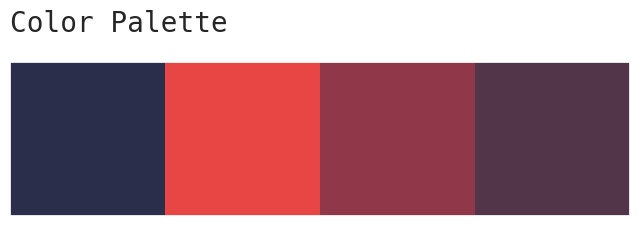

In [26]:
# Color palette for visualization
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#2B2E4A', '#E84545', '#903749', '#53354A']
palette = sns.color_palette(palette=colors)
sns.palplot(palette, size=2.0)
plt.text(-0.5, -0.7, 'Color Palette', {'font':'monospace', 'size':20, 'weight':'normal'})
plt.show()

In [4]:
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None):
    title = f'<b>{title}</b>'
    if not subtitle: return title
    subtitle = f'<span style="font-family:{subtitle_font}; font-size:{subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

import plotly.figure_factory as ff

_ = df.groupby(['cp', 'thal']).size().unstack()
z = _.values.tolist()
x = _.columns.tolist()
y = _.index.tolist()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, xgap=2, ygap=2, colorscale=['#53354A', '#E84545'])
title = format_title('cp', 'thal', 'chol', 10)
fig.update_layout(title_text=title, title_x=0.5, titlefont={'size':20, 'family':'candara'}, template='plotly_dark',
                  xaxis={'side':'bottom'}, xaxis_showgrid=False, yaxis_showgrid=False, yaxis_autorange='reversed',
                  paper_bgcolor='#000000', plot_bgcolor='#2B2E4A', height=350, width=1000)
fig.show()

In [23]:
# Available Templetes
import plotly.express as px

df7 = df
df7['cp'] = df7['cp'].astype(str)
df7['sex'] = df7['sex'].astype(str)
template = ['ggplot2', 'plotly_dark', 'seaborn', 'simple_white', 'plotly']
fig = px.histogram(df7, x='cp', y=None, color='sex', width=1000, height=300, histnorm='percent', template='plotly_dark',
                   color_discrete_map={'male':'RebecaPurple', 'female':'lightsalmon'})
fig.update_layout(title='Gender Chest Pain', font_family='consolas', bargap=0.5, titlefont={'size':20},
                  legend=dict(orientation='v', y=1, yanchor='top', x=1.5, xanchor='right'))
fig.show()

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Data students performance
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], ])
fig.add_trace(go.Pie(labels=df7['cp'], title='Chest Pain', titlefont={'size':20, 'family':'candara'}, values=None, hole=0.85,), col=1, row=1)
fig.update_traces(hoverinfo='label+value', textinfo='label+percent', textfont_size=12)
fig.add_trace(go.Pie(labels=df7['cp'], title='Chest Pain', titlefont={'size':20, 'family':'candara'}, values=None, hole=0.5,), col=2, row=1)
fig.update_traces(hoverinfo='label+value', textinfo='label+percent', textfont_size=12)
fig.layout.update(title='<b>Heart Disease</b>', titlefont={'size':20, 'family':'candara'}, showlegend=False, height=350, width=1000, template=None)
fig.show()

In [36]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Data Titanic
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], ])
fig.add_trace(go.Pie(labels=df7['cp'], values=None, hole=.5, title='Chest Pain', titlefont={'color':None, 'size':20}), row=1, col=1)
fig.update_traces(hoverinfo='label+value', textinfo='label+percent', textfont_size=12, 
                  marker=dict(colors=['lightgray', 'lightseagreen'], line=dict(color='#000000', width=2)))
fig.add_trace(go.Pie(labels=df7['sex'], values=None, hole=.5, title='Sex', titlefont={'color':None, 'size':20}), row=1, col=2)
fig.update_traces(hoverinfo='label+value', textinfo='label+percent', textfont_size=12, 
                  marker=dict(colors=['lightgray', 'lightseagreen'], line=dict(color='#000000', width=2)))
fig.layout.update(title='<b>Heart Disease</b>', titlefont={'size':20, 'color':None, 'family':'candara'}, showlegend=False, height=350, width=1000)
fig.show()

In [40]:
# Data Students Performance
import plotly.express as px

fig = px.sunburst(df7, path=['cp', 'sex'])
fig.update_layout(title_text='<b>Chest Pain vs Gender</b>', titlefont={'size':20, 'family':'candara'}, width=1000, height=350)
fig.show()

In [45]:
fig = px.histogram(df7, x='cp', width=1000, height=350, histnorm='percent', template='simple_white',
                   category_orders={'cp':['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina'], 'sex':['Male', 'Female']},
                   color_discrete_map={'Male':'RebeccaPurple', 'Female':'lightsalmon'})
fig.update_layout(title='Chest Pain Type', font_family='candara', titlefont={'size':20}, legend=dict(orientation='v', y=1, yanchor='top', x=1.0, xanchor='right'), bargap=0.5
                  ).update_xaxes(categoryorder='total descending')
# Custom Color
colors = ['gray',]*4
colors[3] = 'crimson'
colors[0] = 'lightseagreen'
fig.update_traces(marker_color=colors, marker_line_color=None, marker_line_width=2.5, opacity=None)
fig.show()

In [4]:
import pandas as pd
import plotly.express as px

df8 = df
fig = px.histogram(df8, x='cp', width=1000, height=350, histnorm='percent', template='simple_white')
fig.update_layout(title='Types of Chest Pain', font_family='candara', title_font={'size':20}, showlegend=True,
                  bargap=0.5, legend=dict(orientation='v', y=1.0, yanchor='top', x=1.0, xanchor='right'))
fig.update_traces(marker_color=None, marker_line_color='white', marker_line_width=1.5, opacity=0.99)
fig.show()

In [19]:
#colors = ['rgba(38,24,74,0.8)', 'rgba(71,58,131,0.8)', 'rgba(122,120,168,0.8)', 'rgba(164,163,204,0.85)', 'rgba(190,192,213,1)']
df8['sex'] = df8['sex'].astype(str)
data = df8['sex']
fig = px.histogram(df8, y='sex', orientation='h', width=1000, height=350, histnorm='percent', template='plotly_dark')
fig.update_layout(title='<b>Heart Disease</b>', font_family='candara', bargap=0.4, barmode='group', titlefont={'size':22}, paper_bgcolor='black', plot_bgcolor='silver',
                  legend=dict(orientation='v', y=1, yanchor='top', x=1.250, xanchor='right'))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.2, text='Heart Disease',
                        font=dict(family='candara', size=16, color='yellow'), showarrow=False))
annotations.append(dict(xref='paper', yref='paper', x=0.50, y=0.85, text='30.4%',
                        font=dict(family='candara', size=18, color='teal'), showarrow=False))
annotations.append(dict(xref='paper', yref='paper', x=1.08, y=0.19, text='69.6%',
                        font=dict(family='candara', size=18, color='teal'), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=350, margin=dict(l=50, r=50, b=50, t=120))
fig.update_layout(annotations=annotations)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

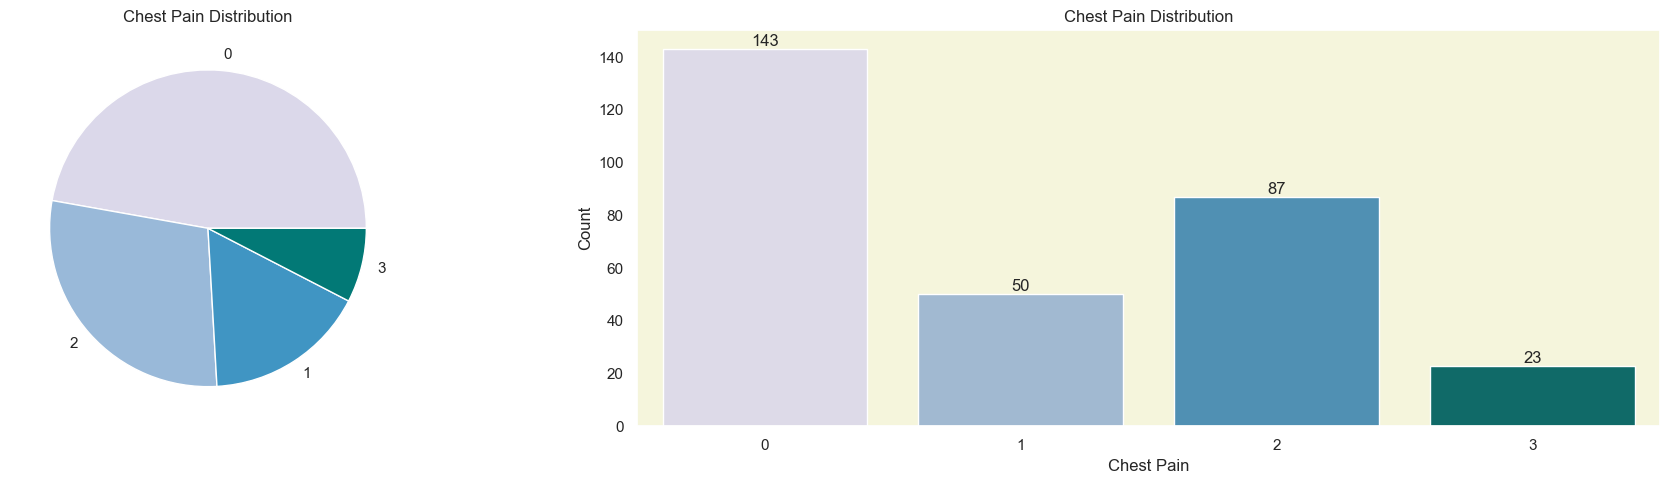

In [23]:
# Plotting the Pie Chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
# Pie Chart
plt.subplot(1,2,1)
quality_counts= df8['cp'].value_counts()
plt.pie(quality_counts, labels=quality_counts.index, colors=sns.color_palette('PuBuGn', len(quality_counts)))
plt.title('Chest Pain Distribution')
# Count Plot
plt.subplot(1,2,2)
ax = sns.countplot(data=df8, x='cp', palette='PuBuGn')
# Add count values above each bar
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.title('Chest Pain Distribution')
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.tight_layout()
plt.show()